In [1]:
#imports
import numpy as np
import numpy.random as rd
import numpy.linalg as linalg
import math
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
def sample(prob): # BS can be done
    r = rd.random();i = 0
    while r > prob[i]:
        r-=prob[i]
        i+=1
    return i

def bernoulli(prob):
    if rd.random() > prob:
        return 1.0
    return 0.0

def row_normalize(arr):
    arr = np.array(arr,float)
    for i in range(np.shape(arr)[0]):
        arr[i] = arr[i]/np.sum(arr[i])
    return arr

def dot(x,y):
    return np.sum(np.multiply(x,y))

In [13]:
en = 3
ch = 3
P = np.array([.2,.4,.4])
E = np.array([[.5,.6,.4],[.2,.3,.1],[.4,.5,.3]])
# E = np.array([[.6,.9,.3],[.3,.5,.1],[.4,.1,.05]])
R = np.array([8.,6.,4.])
# P = row_normalize([np.random.rand(ch)/2])[0]
# E = np.random.rand(en,ch)/2
# R = np.array([np.random.randint(1,10) for i in range(en)])
tol = .3
print(P)
# print(E)
print(R)

[0.2 0.4 0.4]
[8. 6. 4.]


In [3]:
# example 2
en = 6
ch = 8
P = np.array([.3,.1,.2,.4,.3,.1,.3,.3])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4],[.3,.4,.4,.3,.3,.35,.25,.4],[.3,.2,.1,.4,.3,.4,.4,.3],[.4,.3,.3,.5,.6,.4,.55,.35],[.2,.4,.1,.3,.4,.4,.3,.1],[.4,.6,.4,.3,.6,.4,.3,.1]])/2
R = np.array([4.,3.5,4.,8.,2.,3.])
tol = .2
print(P)
print(E)
print(R)

[0.15 0.05 0.1  0.2  0.15 0.05 0.15 0.15]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2  ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2  ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15 ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.275 0.175]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05 ]]
[4.  3.5 4.  8.  2.  3. ]


In [29]:
# example 2
en = 12
ch = 10
P = np.array([.3,.1,.15,.35,.2,.1,.25,.2,.1,.25])/2
E = np.array([[.4,.6,.4,.3,.1,.35,.3,.4,.4,.3],[.3,.4,.4,.3,.3,.35,.25,.4,.4,.25],[.3,.2,.1,.4,.3,.4,.4,.3,.35,.55],[.45,.5,.4,.55,.7,.45,.55,.35,.35,.55],[.2,.4,.1,.3,.4,.4,.3,.1,.1,.3],[.4,.6,.4,.3,.6,.4,.3,.1,.25,.4],[.4,.6,.4,.3,.1,.35,.3,.4,.1,.3],[.55,.45,.45,.3,.3,.35,.25,.4,.4,.1],[.3,.2,.1,.4,.3,.4,.4,.3,.2,.4],[.4,.3,.3,.5,.6,.4,.4,.35,.4,.6],[.2,.4,.1,.3,.4,.4,.3,.1,.4,.25],[.4,.6,.4,.3,.6,.4,.3,.1,.3,.4]])/2
R = np.array([4.,3.5,4.,8,2.,3.,4.,3.5,4.,6.,2.,3.])
tol = .2
print(P)
print(E)
print(R)

[0.15  0.05  0.075 0.175 0.1   0.05  0.125 0.1   0.05  0.125]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.2   0.15 ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2   0.2   0.125]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.175 0.275]
 [0.225 0.25  0.2   0.275 0.35  0.225 0.275 0.175 0.175 0.275]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.05  0.15 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.125 0.2  ]
 [0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.05  0.15 ]
 [0.275 0.225 0.225 0.15  0.15  0.175 0.125 0.2   0.2   0.05 ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.1   0.2  ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.2   0.175 0.2   0.3  ]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.2   0.125]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.15  0.2  ]]
[4.  3.5 4.  8.  2.  3.  4.  3.5 4.  6.  2.  3. ]


In [30]:
ub = np.sum(E*P,axis=1)
ltemp = linprog(c = -1*R, A_ub = [ub], b_ub = [tol],A_eq = np.ones((1,en)),b_eq = [1.0],method='simplex')
print(min(ub))
print(dot(ltemp.x,R), np.sum(ltemp.x),ltemp.con, ltemp.success, dot(ltemp.x,ub))
org_x = ltemp.x
print(ltemp.x)

0.13
5.765517241379311 1.0 [0.] True 0.2
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]


In [31]:
print(en,ch,tol,np.dot(ltemp.x,R),min(ub))
print(P)
print(E)
print(ltemp.x)

12 10 0.2 5.765517241379311 0.13
[0.15  0.05  0.075 0.175 0.1   0.05  0.125 0.1   0.05  0.125]
[[0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.2   0.15 ]
 [0.15  0.2   0.2   0.15  0.15  0.175 0.125 0.2   0.2   0.125]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.175 0.275]
 [0.225 0.25  0.2   0.275 0.35  0.225 0.275 0.175 0.175 0.275]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.05  0.15 ]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.125 0.2  ]
 [0.2   0.3   0.2   0.15  0.05  0.175 0.15  0.2   0.05  0.15 ]
 [0.275 0.225 0.225 0.15  0.15  0.175 0.125 0.2   0.2   0.05 ]
 [0.15  0.1   0.05  0.2   0.15  0.2   0.2   0.15  0.1   0.2  ]
 [0.2   0.15  0.15  0.25  0.3   0.2   0.2   0.175 0.2   0.3  ]
 [0.1   0.2   0.05  0.15  0.2   0.2   0.15  0.05  0.2   0.125]
 [0.2   0.3   0.2   0.15  0.3   0.2   0.15  0.05  0.15  0.2  ]]
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ]


In [32]:
# finding safe x0
ub = E.transpose();tol_arr = [tol]*ch
ltemp = linprog(c=np.zeros(en),A_ub = ub,b_ub=tol_arr,A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-3})
x0 = np.transpose(row_normalize([ltemp.x+(0.0)])) # noise to safe to avoid singular matrices, 1.0e-2 is working
norm_x0 = linalg.norm(x0)
e0 = x0/norm_x0 # safe vector
e0_trans = e0.transpose()
en0 = sample(x0.transpose()[0])
b0 = bernoulli(E[en0][sample(P)])
yt = (E[en0]*(1-b0))+((1-E[en0])*b0)
yt = row_normalize([np.exp(yt)]).transpose()
c0 = dot(x0,np.matmul(E,yt)) # safe cost
print(x0.flatten(),c0)

[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ] 0.17091227981269655


In [33]:
# parameters
reg = 0.1 # lambda > 0, regualarization param
conf = 0.1 # delta >= 0, <= 1, confidence prob -> with 1-del prob tolerance holds
alfa_c = 0.001 # >= 1, ellipse radii, best : 0.001
Sa = 1.;La = 1.;Ra = 1. # assumption parameters
R_sum = np.sum(R)
Rn_trans = R/R_sum
Rn = np.transpose([Rn_trans])
# x = [np.transpose(row_normalize([np.ones(en)]))]
# x = [np.transpose(row_normalize([rd.rand(en)]))]
x = [x0]
r = [dot(x[-1],Rn)];c = [c0]
b = []; enc = [];chnl = []
avg_rate = []

In [34]:
# algo
iop = np.identity(en) - (np.matmul(x0,x0.transpose())/pow(norm_x0,2.0))
sigopt = reg*iop; uopt = 0.0
print(0,dot(x[-1],Rn)*R_sum)
tolx = 0.0
for t in range(1,10000):
    enc.append(sample(x[-1].transpose()[0]))
    chnl.append(sample(P))
    b.append(bernoulli(E[enc[-1]][chnl[-1]]))
    yt = (E[enc[-1]]*(1-b[-1]))+((1-E[enc[-1]])*b[-1])
    yt = row_normalize([np.exp(yt)]).transpose()
    r.append(dot(x[-1],Rn))
    c.append(1.0 - b[-1])  # c.append(dot(x[-1],np.matmul(E,yt)))
    copt = c[-1] - (dot(x[-1],e0)/norm_x0)*c[0]
    xopt = x[-1] - (dot(x[-1],e0)*e0)
    sigopt += np.matmul(xopt,xopt.transpose())
    uopt += (copt*xopt)
    muopt = np.matmul(linalg.pinv(sigopt),uopt) # (inverse is blowing up, singular matrices) so did pseudo(SVD)
    ub = ((c[0]/norm_x0)*e0_trans)+muopt.transpose()+(dot(e0,muopt)*e0_trans)
    betat = Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/reg)/conf))+math.sqrt(reg)*Sa # used log10
    val = max(0.001,alfa_c*betat*linalg.norm(xopt))
    if t > 100:
        tolx = tol + np.mean(b) - 1.0
    try:
        ltemp = linprog(c = -1*Rn_trans, A_ub = ub, b_ub = [tol-val+tolx],A_eq = np.ones((1,en)),b_eq = [1.0],method='revised simplex',options={'tol': 1.0e-2})
    except:
        print(t,'skipped')
        break
        continue
    # print(ub[0])
    x.append(np.transpose([ltemp.x]))
    avg_rate.append(dot(x[-1],Rn)*R_sum)
    print(t,avg_rate[-1],ltemp.success,end=' ')
    print(val,alfa_c*betat*linalg.norm(x[-1] - (dot(x[-1],e0)*e0)),tolx)
# print(copt)
# print(xopt)
# print(sigopt)
# print(uopt)
# print(muopt)
# print(ub,betat)

0 3.9574468085106385
1 8.0 True 0.001 0.0037803293811545925 0.0
2 8.0 True 0.005265643107438358 0.005265643107438358 0.0
3 8.0 True 0.005595113210578695 0.005595113210578695 0.0
4 8.0 True 0.0057839823623764145 0.0057839823623764145 0.0
5 8.0 True 0.0059156390101242785 0.0059156390101242785 0.0
6 8.0 True 0.0060163016351149606 0.0060163016351149606 0.0
7 8.0 True 0.006097573458857667 0.006097573458857667 0.0
8 8.0 True 0.006165595268972085 0.006165595268972085 0.0
9 8.0 True 0.006224004016565245 0.006224004016565245 0.0
10 8.0 True 0.006275128395147443 0.006275128395147443 0.0
11 8.0 True 0.006320547584730004 0.006320547584730004 0.0
12 8.0 True 0.006361380844760162 0.006361380844760162 0.0
13 8.0 True 0.006398449764908148 0.006398449764908148 0.0
14 8.0 True 0.006432374882287765 0.006432374882287765 0.0
15 8.0 True 0.0064636361103408545 0.0064636361103408545 0.0
16 8.0 True 0.006492612094045497 0.006492612094045497 0.0
17 8.0 True 0.006519606725292355 0.006519606725292355 0.0
18 8.0 T

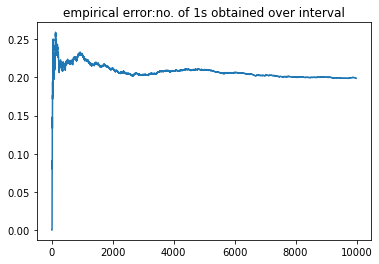

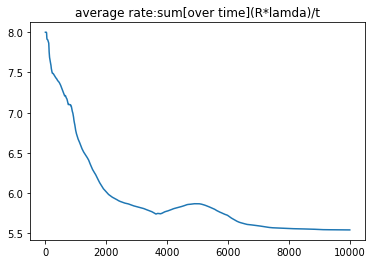

In [35]:
stat = 10
end = 10000
error_plot = 1.0 - np.copy(b)
rate_plot = np.copy(avg_rate)
for i in range(1,len(error_plot)):
    error_plot[i] += (error_plot[i-1]*(i-1))
    error_plot[i] =error_plot[i]/i
plt.plot(error_plot[stat:end])
plt.title('empirical error:no. of 1s obtained over interval')
plt.show()
for i in range(1,len(rate_plot)):
    rate_plot[i] += (rate_plot[i-1]*(i-1))
    rate_plot[i] =rate_plot[i]/i
plt.plot(rate_plot[stat:end])
plt.title('average rate:sum[over time](R*lamda)/t')
plt.show()

In [36]:
print(x0.flatten())
print(x[end-2].flatten(),error_plot[end-2],rate_plot[end-2])
print(org_x,tol,dot(org_x,R))

[0.44680851 0.         0.46808511 0.         0.         0.
 0.         0.08510638 0.         0.         0.         0.        ]
[0.         0.         0.         0.59104139 0.         0.
 0.         0.         0.         0.         0.40895861 0.        ] 0.19893978795759149 5.544353256966339
[0.         0.         0.         0.44137931 0.         0.
 0.55862069 0.         0.         0.         0.         0.        ] 0.2 5.765517241379311


22.824406470294225


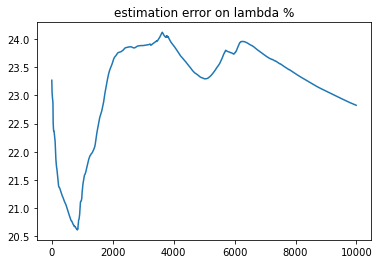

In [37]:
err = []
for i in range(len(x)):
    err.append(np.sqrt(np.sum(np.square(org_x-x[i].flatten()))/en)*100)
    err[i] += (err[i-1]*(i))
    err[i] = err[i]/(i+1)
print(err[-1])
plt.plot(err[stat:end])
plt.title('estimation error on lambda %')
plt.show()

In [ ]:
# Rough

In [23]:
(Ra*math.sqrt(en*math.log10((1+(t-1)*La*La/.1)/0.9))+math.sqrt(.1)*Sa)*linalg.norm(xopt) 

1.2520231159463626

In [ ]:
alfa_c -> lamda error %
0.0 -> 0.7263980978187543
0.0001 -> 0.64
0.001 -> 0.17
0.005 -> 4